In [9]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [11]:
X=df.values

In [12]:
np.shape(X)

(11500, 180)

In [13]:

X=X[:,1:-1]


In [14]:
X

array([[135, 190, 229, ..., -116, -83, -51],
       [386, 382, 356, ..., 154, 143, 129],
       [-32, -39, -47, ..., -35, -35, -36],
       ...,
       [14, 6, -13, ..., -2, -1, -8],
       [-40, -25, -9, ..., 68, 59, 55],
       [29, 41, 57, ..., -2, 2, 20]], dtype=object)

In [15]:
#from sklearn.model_selection import train_test_split
y=np.array(df['y'])
Y=np_utils.to_categorical(y)
Y.shape
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [16]:
np.shape(X_test)

(2300, 178)

In [17]:
X_train = X_train.reshape(-1,178,1)
X_test = X_test.reshape(-1,178,1)
X_train.shape
X_test.shape

(2300, 178, 1)

In [138]:
X_train

array([[-163, -155, -136, ..., -100, -99, -87],
       [-279, -271, -163, ..., -106, -89, -68],
       [51, 54, 42, ..., 81, 40, 8],
       ...,
       [70, 117, 78, ..., 16, 58, 88],
       [-1, 22, 42, ..., 2, -12, -9],
       [-22, -11, -10, ..., 28, 25, 18]], dtype=object)

In [139]:
Y_test

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

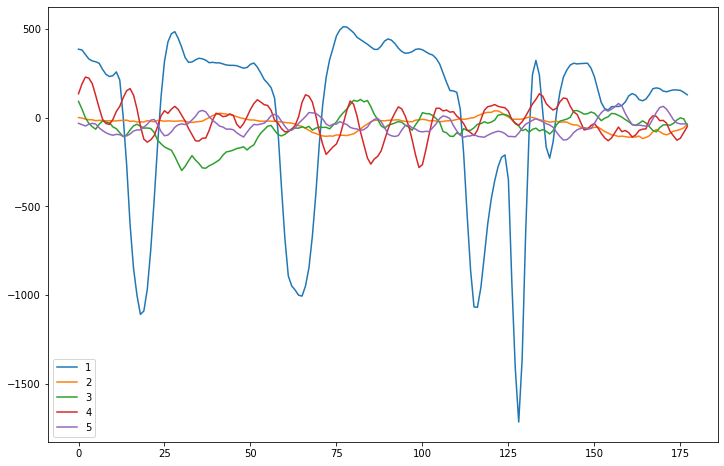

In [7]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

In [18]:
model = Sequential()
model.add(LSTM(56, input_shape=(45,1)))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 45, 56)            12992     
_________________________________________________________________
dropout (Dropout)            (None, 45, 56)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_1 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                1140      
_________________________________________________________________
activation (Activation)      (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#try X=np.asarray(X).astype(np.float32) and Y=np.asarray(Y).astype(np.float32) before passing X and Y to model

In [20]:
X=(X_train[:,::4]-X_train.mean())/X_train.std()
X=np.asarray(X).astype(np.float32)
Y=Y_train[:,1:]
Y=np.asarray(Y).astype(np.float32)

In [23]:
X_train

array([[-157, -127, -96, ..., -73, -104, -87],
       [-212, -23, 77, ..., -196, -163, -68],
       [52, 31, 23, ..., 189, 167, 8],
       ...,
       [43, 5, -135, ..., -17, 15, 88],
       [-27, 41, -19, ..., -26, 26, -9],
       [-30, -6, -12, ..., 17, 22, 18]], dtype=object)

In [32]:
np.shape(X)

(9200, 45, 1)

In [145]:
Y_train

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.]], dtype=float32)

In [158]:
np.shape(Y)
Y

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [21]:
XT=(X_test[:,::4]-X_test.mean())/X_test.std()
XT=np.asarray(XT).astype(np.float32)
YT=Y_test[:,1:]
YT=np.asarray(YT).astype(np.float32)

In [53]:
BS=15
epochsn=15

In [23]:
history = model.fit(X,Y,validation_data=(XT,YT),epochs = 50, batch_size=15,shuffle=False)

Epoch 1/50
614/614 [==============================] - 31s 51ms/step - loss: 0.3839 - accuracy: 0.4247 - val_loss: 0.3817 - val_accuracy: 0.4709
Epoch 2/50
614/614 [==============================] - 28s 46ms/step - loss: 0.3535 - accuracy: 0.5013 - val_loss: 0.3235 - val_accuracy: 0.5857
Epoch 3/50
614/614 [==============================] - 26s 43ms/step - loss: 0.3020 - accuracy: 0.5950 - val_loss: 0.2640 - val_accuracy: 0.6674
Epoch 4/50
614/614 [==============================] - 21s 34ms/step - loss: 0.2658 - accuracy: 0.6426 - val_loss: 0.2490 - val_accuracy: 0.6765
Epoch 5/50
614/614 [==============================] - 21s 34ms/step - loss: 0.2499 - accuracy: 0.6663 - val_loss: 0.2427 - val_accuracy: 0.6787
Epoch 6/50
614/614 [==============================] - 21s 35ms/step - loss: 0.2390 - accuracy: 0.6789 - val_loss: 0.2362 - val_accuracy: 0.6852
Epoch 7/50
614/614 [==============================] - 21s 35ms/step - loss: 0.2368 - accuracy: 0.6808 - val_loss: 0.2327 - val_accuracy:

In [24]:
ypred=model.predict(XT)
yp=np.zeros((YT.shape[0]))
yo=np.ones((YT.shape[0]))
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])
    yo[i]=np.argmax(Y_test[i])

In [157]:
np.shape(XT)

(2300, 44)

In [25]:
np.unique(yo)

array([1., 2., 3., 4., 5.])

In [26]:

#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [27]:


# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [28]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yo, yp)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yo, yp)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yo, yp)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yo, yp)
print('F1 score: %f' % f1)

Accuracy: 0.987826
Precision: 0.975446
Recall: 0.962555
F1 score: 0.968958


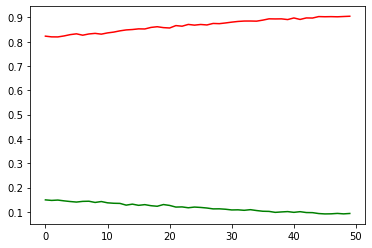

In [65]:
#Train
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['accuracy'],'r')
plt.show()

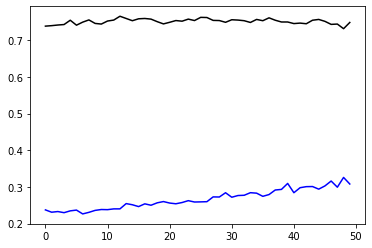

In [64]:
#Test
plt.figure(0)
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['val_accuracy'],'black')
plt.show()

In [ ]:
#boston

In [86]:
df=pd.read_csv('boston.csv')
df

,Unnamed: 0,f1,f2,f3,f4,f5,class
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy
...,...,...,...,...,...,...,...
295,295,0.424106,0.092797,2.301373,2.301373,0.604564,seizure
296,296,0.101266,0.053133,2.301376,2.301376,0.637104,seizure
297,297,0.121906,0.089653,2.301379,2.301379,0.606438,seizure
298,298,0.341561,0.126592,2.301372,2.301372,0.600381,seizure


In [87]:
df2 = df.rename({'class': 'y'}, axis=1)
df2

,Unnamed: 0,f1,f2,f3,f4,f5,y
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,healthy
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,healthy
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,healthy
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,healthy
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,healthy
...,...,...,...,...,...,...,...
295,295,0.424106,0.092797,2.301373,2.301373,0.604564,seizure
296,296,0.101266,0.053133,2.301376,2.301376,0.637104,seizure
297,297,0.121906,0.089653,2.301379,2.301379,0.606438,seizure
298,298,0.341561,0.126592,2.301372,2.301372,0.600381,seizure


In [88]:
df2['y'] = df2.y.map({'healthy': 0, 'seizure': 1, 'transation': 2})
df2


,Unnamed: 0,f1,f2,f3,f4,f5,y
0,0,0.887621,0.185875,2.299474,2.299474,0.581396,0
1,1,0.783744,0.163794,2.299480,2.299480,0.588340,0
2,2,0.875873,0.154714,2.299477,2.299477,0.589802,0
3,3,0.881293,0.138396,2.299481,2.299481,0.592911,0
4,4,0.798116,0.125291,2.299481,2.299481,0.595338,0
...,...,...,...,...,...,...,...
295,295,0.424106,0.092797,2.301373,2.301373,0.604564,1
296,296,0.101266,0.053133,2.301376,2.301376,0.637104,1
297,297,0.121906,0.089653,2.301379,2.301379,0.606438,1
298,298,0.341561,0.126592,2.301372,2.301372,0.600381,1


In [89]:
X=df2.values

In [90]:
X=X[:,1:-1]
X

array([[0.8876206 , 0.18587486, 2.29947393, 2.29947393, 0.58139559],
       [0.78374388, 0.16379436, 2.29947989, 2.29947989, 0.58834032],
       [0.87587262, 0.15471405, 2.29947693, 2.29947693, 0.58980158],
       ...,
       [0.12190591, 0.08965272, 2.30137916, 2.30137916, 0.60643813],
       [0.34156111, 0.12659211, 2.30137162, 2.30137162, 0.60038083],
       [0.25939333, 0.09691405, 2.3013799 , 2.3013799 , 0.59970394]])

In [91]:
y=np.array(df2['y'])
Y=np_utils.to_categorical(y)
Y.shape

(300, 3)

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [56]:
X_train = X_train.reshape(-1,5,1)
X_test = X_test.reshape(-1,5,1)
X_train.shape
X_train.shape

(210, 5, 1)

In [57]:
Y_train.shape

(210, 3)

In [63]:
model = Sequential()
model.add(LSTM(56, input_shape=(5,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 5, 56)             12992     
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 56)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_7 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1140      
_________________________________________________________________
activation_6 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [93]:
X=(X_train-X_train.mean())/X_train.std()
X=np.asarray(X).astype(np.float32)
Y=Y_train[:,1:]
Y=np.asarray(Y).astype(np.float32)

In [94]:
XT=(X_test-X_test.mean())/X_test.std()
XT=np.asarray(XT).astype(np.float32)
YT=Y_test[:,1:]
YT=np.asarray(YT).astype(np.float32)

In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
hist1 = model.fit(X,Y,validation_data=(XT,YT),epochs = 50, batch_size=10,shuffle=False)

Epoch 1/50
21/21 [==============================] - 0s 5ms/step - loss: 0.4963 - accuracy: 0.7190 - val_loss: 0.4720 - val_accuracy: 0.8000
Epoch 2/50
21/21 [==============================] - 0s 5ms/step - loss: 0.4988 - accuracy: 0.7190 - val_loss: 0.4729 - val_accuracy: 0.8000
Epoch 3/50
21/21 [==============================] - 0s 5ms/step - loss: 0.5034 - accuracy: 0.7333 - val_loss: 0.4733 - val_accuracy: 0.8000
Epoch 4/50
21/21 [==============================] - 0s 5ms/step - loss: 0.5035 - accuracy: 0.7286 - val_loss: 0.4709 - val_accuracy: 0.8111
Epoch 5/50
21/21 [==============================] - 0s 5ms/step - loss: 0.4947 - accuracy: 0.7095 - val_loss: 0.4741 - val_accuracy: 0.8000
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 0.5009 - accuracy: 0.7476 - val_loss: 0.4709 - val_accuracy: 0.8111
Epoch 7/50
21/21 [==============================] - 0s 5ms/step - loss: 0.4964 - accuracy: 0.7143 - val_loss: 0.4746 - val_accuracy: 0.8000
Epoch 8/50
21/21 [==

In [67]:
ypred=model.predict(XT)

In [68]:
yp=np.zeros((YT.shape[0]))
yo=np.ones((YT.shape[0]))

In [69]:
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [70]:
np.unique(yo)

array([0., 1., 2.])

In [71]:

#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [72]:

# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


In [73]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yo, yp)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yo, yp)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yo, yp)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yo, yp)
print('F1 score: %f' % f1)

Accuracy: 0.766667
Precision: 0.605263
Recall: 0.793103
F1 score: 0.686567


In [74]:
train_acc = model.evaluate(X, Y, verbose=0)
_, test_acc = model.evaluate(XT, YT, verbose=0)

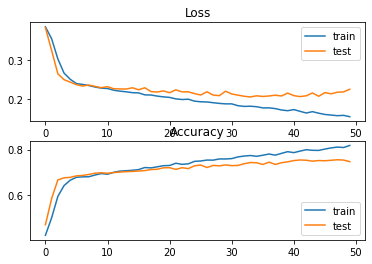

In [75]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

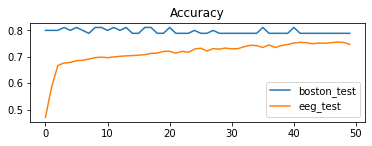

In [76]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist1.history['val_accuracy'], label='boston_test')
pyplot.plot(history.history['val_accuracy'], label='eeg_test')
pyplot.legend()
pyplot.show()

In [100]:
#CHBMIT _LSTM
multiple_patients = True
ID = False
data = pd.read_csv("CHB_MIT.csv")
data = data.sample(n=10000)
X = data.loc[:, data.columns != "seizure"]
X = X.loc[:, X.columns != "start_time"]
X = X.loc[:, X.columns != "file ID"]
Y = np.asarray(data['seizure'])
feature_names = X.columns.tolist()
print('The number of samples for the non-seizure class is:', Y.shape[0])
print('The number of samples for the seizure class is:', np.sum(Y))

# if multiple patients, one-hot encode patient ID
if multiple_patients:
    X = X.loc[:, X.columns != "subject"] 
    if ID:
        patient = pd.get_dummies(data['subject'], prefix='subject')
        X = pd.concat([X, patient], axis = 1)

The number of samples for the non-seizure class is: 10000
The number of samples for the seizure class is: 33


In [101]:
X=X.values
#X=X[:,1:]
X

array([[9.34478961e-06, 8.72562865e-11, 8.87082093e-02, ...,
        2.09459935e-01, 9.77058463e-02, 8.09393175e-02],
       [8.67803912e-05, 7.52817050e-09, 2.58707929e+00, ...,
        1.85221898e-01, 1.42806385e-01, 1.71220051e-01],
       [6.34153649e-05, 4.02306158e-09, 2.03432482e+01, ...,
        1.03895090e-01, 6.39819452e-02, 5.37495170e-02],
       ...,
       [1.92398829e-05, 3.67210958e-10, 7.37912592e-01, ...,
        1.74908659e-01, 1.17082658e-01, 6.04098669e-02],
       [8.18385958e-05, 6.69047199e-09, 1.87194521e+00, ...,
        1.34851904e-01, 1.61538075e-01, 1.15315817e-01],
       [3.60352646e-05, 1.29880273e-09, 1.04615979e+00, ...,
        1.18791723e-01, 1.63158343e-01, 1.51742885e-01]])

In [102]:
y=np.array(data['seizure'])
Y=np

In [104]:
y=np.array(data['seizure'])
Y=np_utils.to_categorical(y)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [106]:
X_train = X_train.reshape(-1,506,1)
X_test = X_test.reshape(-1,506,1)
X_train.shape
X_train.shape

(8000, 506, 1)

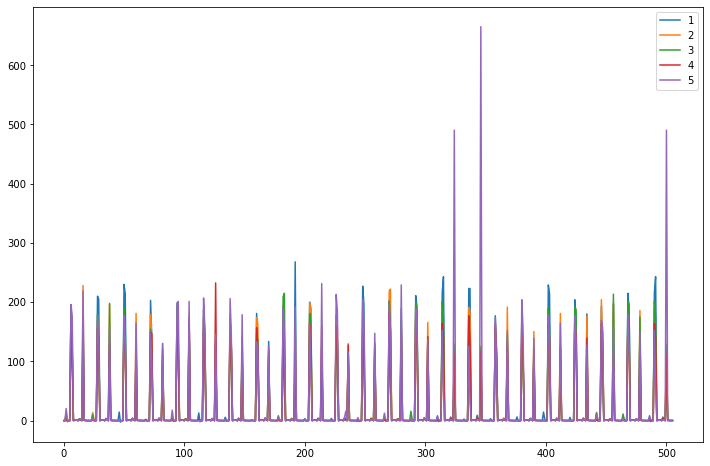

In [107]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

In [108]:
model = Sequential()
model.add(LSTM(56, input_shape=(127,1), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(56))
model.add(Dropout(0.3))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 127, 56)           12992     
_________________________________________________________________
dropout_8 (Dropout)          (None, 127, 56)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 56)                25312     
_________________________________________________________________
dropout_9 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 20)                1140      
_________________________________________________________________
activation_52 (Activation)   (None, 20)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 2)                

In [109]:
XT=(X_test[:,::4]-X_test.mean())/X_test.std()
XT=np.asarray(XT).astype(np.float32)
YT=Y_test[:,1:]
YT=np.asarray(YT).astype(np.float32)

In [110]:
X=(X_train[:,::4]-X_train.mean())/X_train.std()
X=np.asarray(X).astype(np.float32)
Y=Y_train[:,1:]
Y=np.asarray(Y).astype(np.float32)

In [111]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [113]:
histC = model.fit(X,Y,validation_data=(XT,YT),epochs = 50, batch_size=128,shuffle=False)

Epoch 1/50
63/63 [==============================] - 35s 559ms/step - loss: 0.6932 - accuracy: 0.5045 - val_loss: 0.6931 - val_accuracy: 0.7570
Epoch 2/50
63/63 [==============================] - 31s 488ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.1385
Epoch 3/50
63/63 [==============================] - 33s 521ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.9390
Epoch 4/50
63/63 [==============================] - 33s 531ms/step - loss: 0.6931 - accuracy: 0.4969 - val_loss: 0.6931 - val_accuracy: 0.9940
Epoch 5/50
63/63 [==============================] - 33s 523ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.0545
Epoch 6/50
63/63 [==============================] - 33s 525ms/step - loss: 0.6931 - accuracy: 0.4972 - val_loss: 0.6931 - val_accuracy: 0.9550
Epoch 7/50
63/63 [==============================] - 34s 539ms/step - loss: 0.6931 - accuracy: 0.4991 - val_loss: 0.6931 - val_accuracy: 0.0200

In [114]:
ypred=model.predict(XT)
yp=np.zeros((YT.shape[0]))
yo=np.ones((YT.shape[0]))
for i in range(Y_test.shape[0]):
    yp[i]=np.argmax(ypred[i])+1
    yo[i]=np.argmax(Y_test[i])

In [115]:
np.unique(yo)

array([0., 1.])

In [116]:

#conversion of classes
for i in range(Y_test.shape[0]):
    if yo[i]!=1:
        yo[i]=0
    if yp[i]!=1:
        yp[i]=0

In [117]:

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(yo, yp)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yo, yp)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yo, yp)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yo, yp)

Accuracy: 0.004500
Precision: 0.004500
Recall: 1.000000


In [118]:
train_acc = model.evaluate(X, Y, verbose=0)
_, test_acc = model.evaluate(XT, YT, verbose=0)

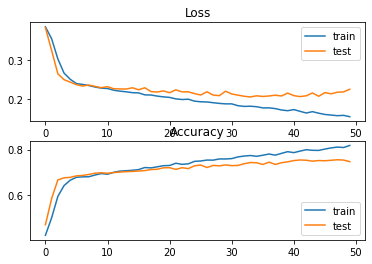

In [119]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

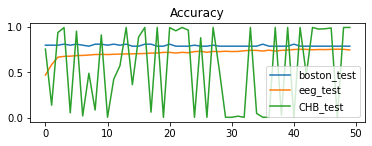

In [121]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(hist1.history['val_accuracy'], label='boston_test')
pyplot.plot(history.history['val_accuracy'], label='eeg_test')
pyplot.plot(histC.history['val_accuracy'], label='CHB_test')
pyplot.legend()
pyplot.show()